In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

traind = pd.read_csv("C:\\Users\\ericp\\OneDrive\\Documents\\GitHub\\2.01-lab-pandas-titanic\\Data\\train.csv")

In [2]:
traind.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
traind.info() 
#viewing for NaN Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
traind['Cabin'].loc[0:10]
#Looking through Cabin for NaNs or incompatible types
#Looks like NaNs

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
Name: Cabin, dtype: object

In [5]:
#Setting up bar chart to graph values. Reversing the data values
inverselist = [891 for x in range(0, 12)]
plotbar = inverselist - traind.count()


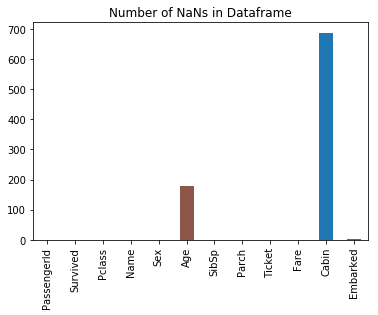

In [6]:
plotbar.plot(kind = "bar")
plt.title('Number of NaNs in Dataframe')
plt.show()

In [7]:
#Dropping NaN rows for 'Embarked'
traind.dropna(subset=['Embarked'], inplace=True)
traind.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            712 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          202 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [8]:
#Putting weird shoulder shrug guy into NA for Cabins
traind['Cabin'].fillna('¯\(ツ)/¯', inplace = True)
traind[0:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S


In [9]:
#Creating family count series
FamilyCount = pd.Series([x + y for x,y in zip(traind['SibSp'], traind['Parch'])])
FamilyCount [0:10]

0    1
1    1
2    0
3    1
4    0
5    0
6    0
7    4
8    2
9    1
dtype: int64

In [10]:
#Adding family count to the df
combineddf = pd.concat([traind, FamilyCount], axis=1)
combineddf.rename(columns={0:'FamilyCount'}, inplace=True)
combineddf[0:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,¯\(ツ)/¯,S,1.0
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C,1.0
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0.0
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,1.0
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,¯\(ツ)/¯,S,0.0


In [11]:
#Creating Reverends and adding
reverend = list()

for z in combineddf['Name']:
    if 'Rev.' in str(z):
        reverend.append(1)
    else:
        reverend.append(0)
reverend = pd.Series(reverend)

combineddf = pd.concat([combineddf, reverend], axis=1)
combineddf.rename(columns={0:'IsReverend'}, inplace=True)


In [12]:
EmbarkDummy=pd.get_dummies(combineddf['Embarked'])
Embarked_C = EmbarkDummy[['C']]
Embarked_Q = EmbarkDummy[['Q']]
Embarked_S = EmbarkDummy[['S']]

combineddf = pd.concat([combineddf, Embarked_C, Embarked_Q, Embarked_S], axis=1)
combineddf[0:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,C,Q,S
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,¯\(ツ)/¯,S,1.0,0,0,0,1
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C,1.0,0,1,0,0


In [13]:
SexDummy=pd.get_dummies(combineddf['Sex'])
Sex_F = SexDummy['female']
Sex_M = SexDummy['male']

combineddf = pd.concat([combineddf, Sex_F, Sex_M], axis=1)
combineddf[0:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,C,Q,S,female,male
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,¯\(ツ)/¯,S,1.0,0,0,0,1,0,1
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C,1.0,0,1,0,0,1,0


In [14]:
combineddf[0:4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,C,Q,S,female,male
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,¯\(ツ)/¯,S,1.0,0,0,0,1,0,1
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C,1.0,0,1,0,0,1,0
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0.0,0,0,0,1,1,0
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,1.0,0,0,0,1,1,0


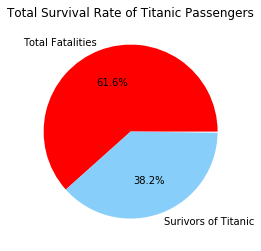

In [15]:
#Survival Rates of Passengers
Survival = combineddf['Survived'].value_counts() 
Survivalpercent= Survival/len(combineddf['Survived'])
Survivalpercent
labels='Total Fatalities', 'Surivors of Titanic'
colors = ['red', 'lightskyblue']
plt.pie(Survivalpercent, labels=labels, autopct='%1.1f%%', colors=colors);
plt.title('Total Survival Rate of Titanic Passengers');

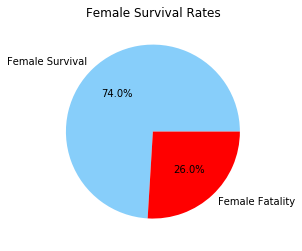

In [16]:
FemPop = combineddf[(combineddf['female'] == 1)]['female'].value_counts ()#How many Females 312
FemPop = 312 #Set to an absolute otherwise 1 will only pass on other 1 values
FemSur = combineddf[(combineddf['female'] == 1)]['Survived'].value_counts() #How many female survivors 231 vs 81 drowned
Femrates = FemSur/FemPop
labels='Female Survival', 'Female Fatality'
colors = ['lightskyblue', 'red' ]
plt.pie(Femrates, labels=labels, autopct='%1.1f%%', colors=colors);
plt.title('Female Survival Rates');

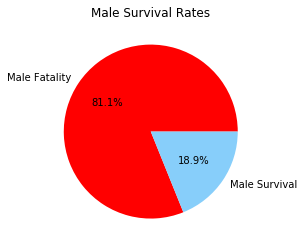

In [17]:
MalPop = combineddf[(combineddf['male'] == 1)]['male'].value_counts ()#How many Males 577
MalPop = 577
MalSur = combineddf[(combineddf['male'] == 1)]['Survived'].value_counts() #Males 109 Survived 468 Died
Malrates = MalSur/MalPop
labels = 'Male Fatality', 'Male Survival'
colors = ['red', 'lightskyblue']
plt.pie(Malrates, labels=labels, autopct='%1.1f%%', colors=colors);
plt.title('Male Survival Rates');

Text(0.5, 1.0, 'Number of passengers based on class')

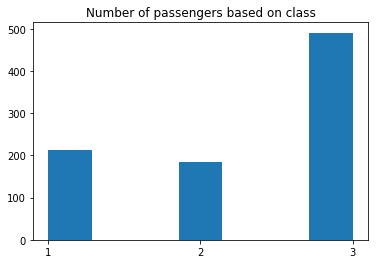

In [150]:
PclassDiv = combineddf['Pclass']
plt.hist(PclassDiv, bins=7);
plt.xticks([1,2,3])
plt.title('Number of passengers based on class')

In [19]:
#Graphing all PClasses with Survival Rates
Pclass1 = combineddf[(combineddf['Pclass'] == 1)]['Survived'].value_counts()
Pclass2 = combineddf[(combineddf['Pclass'] == 2)]['Survived'].value_counts()
Pclass3 = combineddf[(combineddf['Pclass'] == 3)]['Survived'].value_counts()

Pclass1 #134 survived 80 dead
Pclass2 #97 dead, 87 survived
Pclass3 #372 dead, 119 survived

0.0    372
1.0    119
Name: Survived, dtype: int64

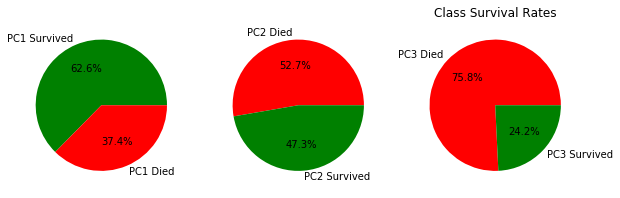

In [20]:
figure, ax = plt.subplots(nrows=1, ncols=3, figsize = (10,4) )
plt.title('Class Survival Rates')
labels1 = 'PC1 Survived' , 'PC1 Died'
labels2 = 'PC2 Died', 'PC2 Survived'
labels3 = 'PC3 Died', 'PC3 Survived'
colors1 = ['green', 'red']
colors2 = ['red', 'green']
ax[0].pie(Pclass1, labels=labels1, colors=colors1, autopct='%1.1f%%' );
ax[1].pie(Pclass2, labels=labels2, colors=colors2, autopct='%1.1f%%');
ax[2].pie(Pclass3, labels=labels3, colors=colors2, autopct='%1.1f%%');

#The higher the class the better survival rate

In [21]:
reverenddead=combineddf[(combineddf['IsReverend'] ==1)]['Survived'] 
reverenddead
# All reverends.... they dead


149    0.0
150    0.0
249    0.0
626    0.0
848    0.0
886    0.0
Name: Survived, dtype: float64

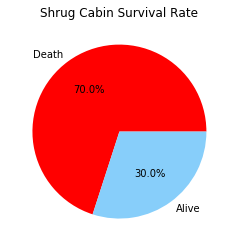

In [22]:
#What is the survival rate for cabins marked ¯\(ツ)/¯

ShrugCabin = (combineddf[(combineddf['Cabin'] == '¯\(ツ)/¯')]['Survived'].value_counts()) 
combineddf[(combineddf['Cabin'] == '¯\(ツ)/¯')].shape
ShrugCabinSize = 687
ShrugCabinSurv = ShrugCabin/ShrugCabinSize


labels='Death', 'Alive'
colors = ['red', 'lightskyblue']
plt.title('Shrug Cabin Survival Rate')
plt.pie(ShrugCabinSurv, labels=labels, autopct='%1.1f%%', colors=colors);


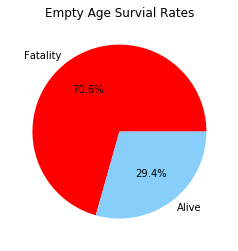

In [23]:
#What is the survival rate for people whose Age is empty?
EmptyAgeSurv = combineddf[(combineddf['Age'].isnull() ==True)]['Survived'].value_counts()
EAP = EmptyAgeSurv /177 

plt.title('Empty Age Survial Rates')
labels = 'Fatality', 'Alive'
plt.pie(EAP, labels=labels, autopct='%1.1f%%', colors=colors);


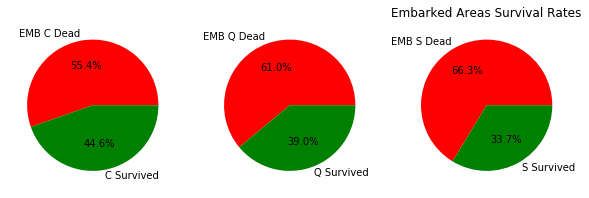

In [24]:
#What is the survival rate for each port of embarkation?
embC = (combineddf[(combineddf['C'] == 1)]['Survived'].value_counts()) / sum((combineddf[(combineddf['C'] == 1)]['Survived'].value_counts()))
embQ = (combineddf[(combineddf['Q'] == 1)]['Survived'].value_counts()) / sum((combineddf[(combineddf['Q'] == 1)]['Survived'].value_counts()))
embS = (combineddf[(combineddf['S'] == 1)]['Survived'].value_counts()) / sum((combineddf[(combineddf['S'] == 1)]['Survived'].value_counts()))

figure, ax = plt.subplots(nrows=1, ncols=3, figsize = (10,4) )
plt.title('Embarked Areas Survival Rates')
labels1 = 'EMB C Dead' , 'C Survived'
labels2 = 'EMB Q Dead' , 'Q Survived'
labels3 = 'EMB S Dead' , 'S Survived'
colors = ['red', 'green']
ax[0].pie(embC, labels=labels1, colors=colors, autopct='%1.1f%%' );
ax[1].pie(embQ, labels=labels2, colors=colors, autopct='%1.1f%%');
ax[2].pie(embS, labels=labels3, colors=colors, autopct='%1.1f%%');

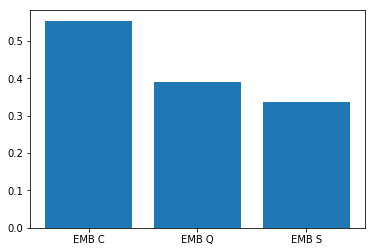

In [25]:
#Version 2
embC = (combineddf[(combineddf['C'] == 1)& (combineddf['Survived'] == 1)]['Survived'].value_counts()) / sum((combineddf[(combineddf['C'] == 1)]['Survived'].value_counts()))
embQ = (combineddf[(combineddf['Q'] == 1)& (combineddf['Survived'] == 1)]['Survived'].value_counts()) / sum((combineddf[(combineddf['Q'] == 1)]['Survived'].value_counts()))
embS = (combineddf[(combineddf['S'] == 1)& (combineddf['Survived'] == 1)]['Survived'].value_counts()) / sum((combineddf[(combineddf['S'] == 1)]['Survived'].value_counts()))

x = [embC[1], embQ[1], embS[1]] 
xrange = ['EMB C', 'EMB Q', 'EMB S']
plt.bar(xrange, x)
plt.xticks(xrange);

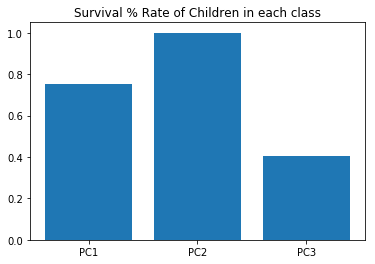

In [26]:
#What is the survival rate for children (under 12) in each Pclass?


P1chil = (combineddf[(combineddf['Pclass'] == 1) &(combineddf['Age'] < 12)]['Survived'].value_counts()) / sum((combineddf[(combineddf['Pclass'] == 1) &(combineddf['Age'] < 12)]['Survived'].value_counts()) )
P2chil = (combineddf[(combineddf['Pclass'] == 2) &(combineddf['Age'] < 12)]['Survived'].value_counts()) / sum((combineddf[(combineddf['Pclass'] == 2) &(combineddf['Age'] < 12)]['Survived'].value_counts()) )
P3chil = (combineddf[(combineddf['Pclass'] == 3) &(combineddf['Age'] < 12)]['Survived'].value_counts()) / sum((combineddf[(combineddf['Pclass'] == 3) &(combineddf['Age'] < 12)]['Survived'].value_counts()) )


x = [P1chil[1], P2chil[1], P3chil[1]] 
xrange = ['PC1', 'PC2', 'PC3']
plt.bar(xrange, x)
plt.title('Survival % Rate of Children in each class')
plt.xticks(xrange);


In [27]:
#Did the captain of the ship survive? Is he on the list?

for x in range(0, len(combineddf)):
    if "Capt" in str(combineddf['Name'][x]):
        print(x)
        
combineddf.iloc[745]
#Captain went down with the ship

745


PassengerId                             746
Survived                                  0
Pclass                                    1
Name           Crosby, Capt. Edward Gifford
Sex                                    male
Age                                      70
SibSp                                     1
Parch                                     1
Ticket                            WE/P 5735
Fare                                     71
Cabin                                   B22
Embarked                                  S
FamilyCount                               2
IsReverend                                0
C                                         0
Q                                         0
S                                         1
female                                    0
male                                      1
Name: 745, dtype: object

In [28]:
#Of all the people that died, who had the most expensive ticket? How much did it cost?

combineddf['Fare'][(combineddf['Survived'] == 0)].sort_values(ascending  = False)


27     263.0000
438    263.0000
118    247.5208
557    227.5250
527    221.7792
377    211.5000
332    153.4625
498    151.5500
297    151.5500
373    135.6333
659    113.2750
698    110.8833
505    108.9000
544    106.4250
245     90.0000
62      83.4750
34      82.1708
262     79.6500
139     79.2000
789     79.2000
741     78.8500
102     77.2875
124     77.2875
120     73.5000
665     73.5000
655     73.5000
72      73.5000
385     73.5000
745     71.0000
846     69.5500
         ...   
131      7.0500
465      7.0500
784      7.0500
477      7.0458
129      6.9750
825      6.9500
411      6.8583
654      6.7500
143      6.7500
371      6.4958
202      6.4958
818      6.4500
843      6.4375
326      6.2375
872      5.0000
378      4.0125
413      0.0000
822      0.0000
674      0.0000
633      0.0000
481      0.0000
815      0.0000
302      0.0000
806      0.0000
466      0.0000
732      0.0000
597      0.0000
263      0.0000
277      0.0000
179      0.0000
Name: Fare, Length: 549,

In [29]:

combineddf.iloc[27]

#Mr. Charles Alexander Fortune had the misforturne of paying the most and dying

PassengerId                                28
Survived                                    0
Pclass                                      1
Name           Fortune, Mr. Charles Alexander
Sex                                      male
Age                                        19
SibSp                                       3
Parch                                       2
Ticket                                  19950
Fare                                      263
Cabin                             C23 C25 C27
Embarked                                    S
FamilyCount                                 5
IsReverend                                  0
C                                           0
Q                                           0
S                                           1
female                                      0
male                                        1
Name: 27, dtype: object

([<matplotlib.axis.XTick at 0x2a6e99bcef0>,
 <a list of 2 Text xticklabel objects>)

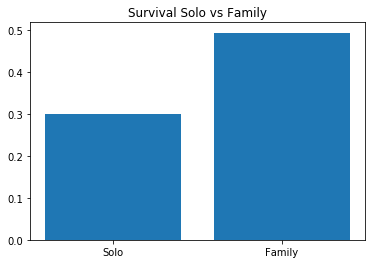

In [30]:
#Does having family on the boat help or hurt your chances of survival?

FamRates = combineddf[((combineddf['SibSp'] > 0) | (combineddf['Parch'] > 0))]['Survived'].value_counts() 
NoFamRates = combineddf[((combineddf['SibSp'] == 0) & (combineddf['Parch'] == 0))]['Survived'].value_counts() 

FamPercent =FamRates / sum(FamRates) #554
NoFamPercent =NoFamRates / sum(NoFamRates)#335 

x = [NoFamPercent[1], FamPercent[0]]
xrange = ['Solo', 'Family']
plt.title("Survival Solo vs Family")
plt.bar(xrange, x)
plt.xticks(xrange)


In [31]:
# Visualizations and Insights (focused on Age):

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A6EF5A72E8>]],
      dtype=object)

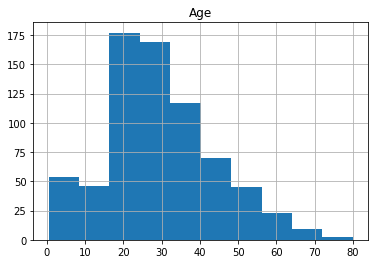

In [130]:
#Age Ranges frequency
combineddf.hist('Age', bins= 10)


In [136]:
#Survival by age %. 
age_survival_freq = combineddf[(combineddf['Survived'] == 1)]['Age'].value_counts() / combineddf['Age'].value_counts()
age_survival_freq.dropna(inplace=True)
age_survival_freq

agelist=[
age_survival_freq[0:11].mean(),
age_survival_freq[11:21].mean(),
age_survival_freq[21:31].mean(),
age_survival_freq[31:41].mean(),
age_survival_freq[41:51].mean(),
age_survival_freq[51:61].mean(),
age_survival_freq[61:71].mean(),
age_survival_freq[71:81].mean(),
]


In [137]:
agelist

[0.7031746031746031,
 0.4980878924996572,
 0.38227057445727525,
 0.42503172209054557,
 0.39750305250305246,
 0.5325892857142858,
 0.6666666666666666,
 1.0]

Text(0.5, 1.0, 'Survival rate based on age')

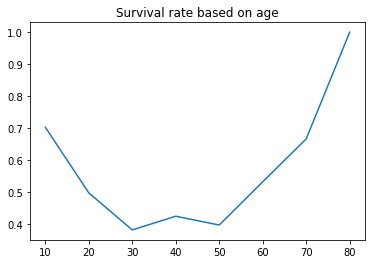

In [140]:
plt.plot([10,20,30,40,50,60,70,80], agelist);
plt.title('Survival rate based on age')